In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

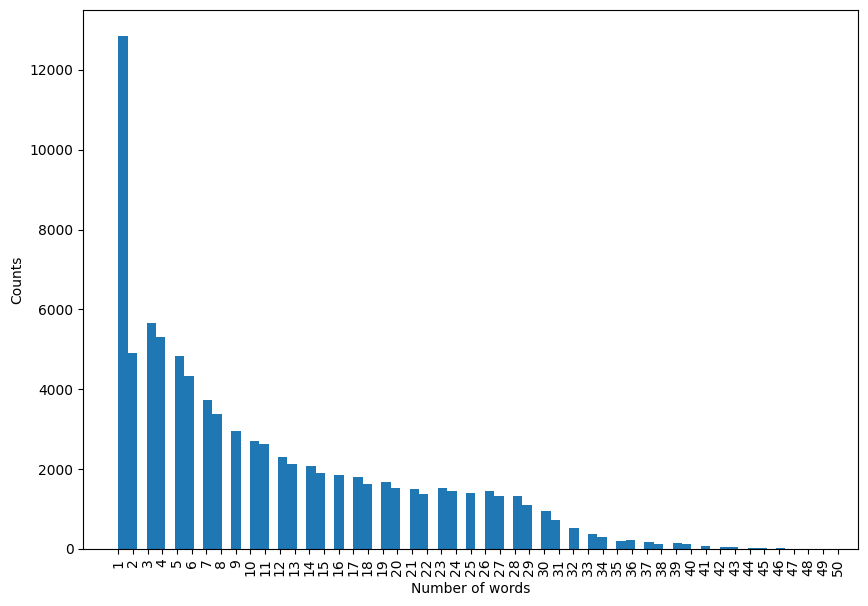

In [47]:
data = pd.read_csv("../combined_comments_3.csv", encoding='utf-8')
data = data.dropna(subset=['text', 'create_time'])

data = data.reset_index()

lengths = [len(i.split(' ')) for i in data['text']]
lengths = [i for i in lengths if i < 50]
# lengths = [np.log(i) for i in lengths]

plt.figure(figsize=(10, 7))
plt.hist(lengths, bins=get_fdr(lengths), log=False)
plt.xticks(list(range(1,51)), rotation=90)
plt.xlabel("Number of words"); plt.ylabel("Counts")
plt.savefig(f'./exploratory_plots/words_pre_3.png')
plt.show()

In [42]:
comments_per_vid = data['video_id'].value_counts().values
comments_per_vid2 = [i for i in comments_per_vid if i > 50]

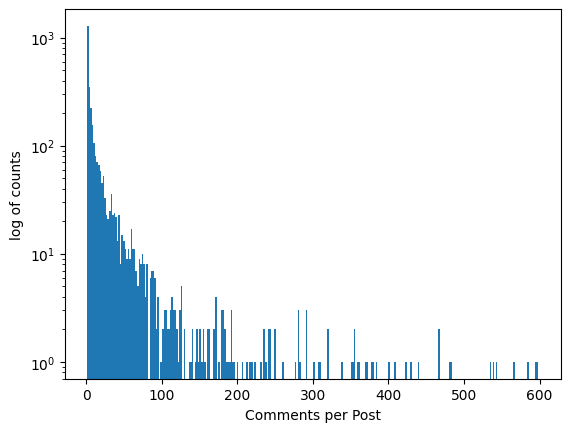

In [44]:
plt.hist(comments_per_vid, bins=get_fdr(comments_per_vid), log=True)
plt.xlabel("Comments per Post"); plt.ylabel("log of counts")
plt.savefig(f'./exploratory_plots/per_post_post_3.png')
plt.show()

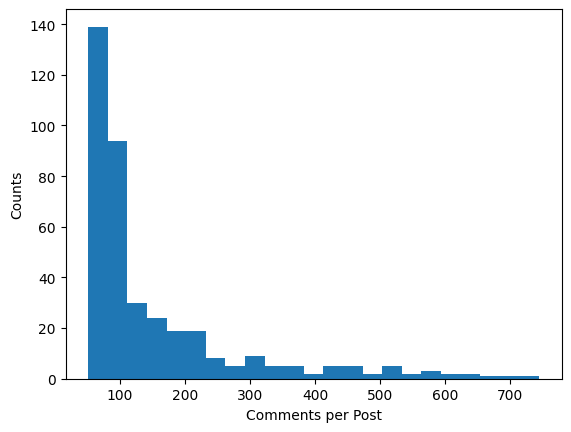

In [14]:
plt.hist(comments_per_vid2, bins=get_fdr(comments_per_vid2))
plt.xlabel("Comments per Post"); plt.ylabel("Counts")
# plt.savefig(f'./exploratory_plots/per_post_post_4_zoomed.png')
plt.show()

In [39]:
# data[data['create_time'].isna()]

for i in list(data['create_time']):
    try:
        a = datetime.datetime.fromtimestamp(i)
    except OSError:
        print(i)

In [40]:
data['create_time'][0]

1698724830.0

In [34]:
data1 = pd.read_csv("./combined_comments_3/df_dropped.csv", encoding='utf-8')
data1 = data1.dropna(subset=['message'])
data1 = data1.reset_index()

data2 = pd.read_csv("./combined_comments_4/df_dropped.csv", encoding='utf-8')
data2 = data2.dropna(subset=['message'])
data2 = data2.reset_index()

data3 = pd.read_csv('../all_months.csv', encoding='utf-8')
data3 = data3.dropna(subset=['id'])
data3 = data3.reset_index()

In [35]:
import datetime
from collections import Counter

datas = [data1, data2, data3]
# datas = [data1, data3]
all_month_year_counts = []
for data in datas:
    unix_times = [i for i in data['create_time'] if i<7.30153253756199e+18]
    datetime_objects = [datetime.datetime.fromtimestamp(i) for i in list(unix_times)]
    month_year_list = [f"{i.month}_{i.year}" for i in datetime_objects]
    
    month_year_counts = Counter(month_year_list)
    all_month_year_counts.append(month_year_counts)

In [36]:
all_counts_ordered = []
for month_year_counts in all_month_year_counts:
    ordered_months = [f"{i}_{j}" for j in [2023, 2024] for i in range(1,13)] + ["1_2025"]
    counts_ordered = []
    for i in ordered_months:
        counts_ordered.append(month_year_counts[i])
        
    all_counts_ordered.append(counts_ordered)

/tmp/ipykernel_3020/2998972573.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(len(counts_ordered)), np.log(j))
/tmp/ipykernel_3020/2998972573.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(len(counts_ordered)), np.log(j))


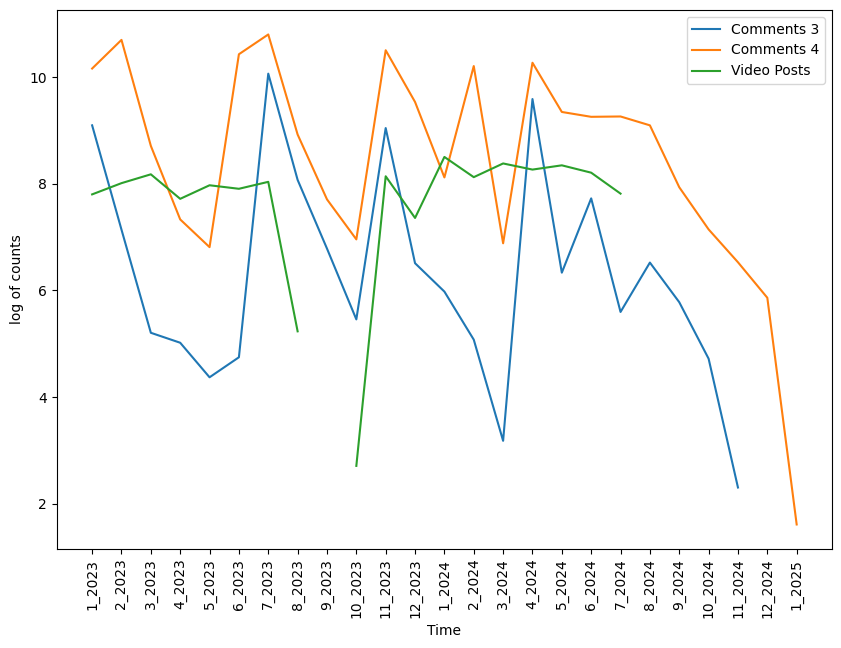

In [45]:
plt.figure(figsize=(10, 7))
for j in all_counts_ordered:
    plt.plot(range(len(counts_ordered)), np.log(j))
    plt.xticks(range(len(counts_ordered)), ordered_months, rotation=90)
    # plt.axhline(y=0)
# plt.legend(['Comments', 'Video Posts'])
plt.legend(['Comments 3', 'Comments 4', 'Video Posts'])
plt.xlabel('Time'); plt.ylabel('log of counts')
plt.savefig(f'./exploratory_plots/time_dist.png')
plt.show()

In [114]:
datetime_object = datetime.datetime.fromtimestamp(data['create_time'][0])
datetime_object.hour

21

In [66]:
print(7.260892672888442e+18)

7.260892672888442e+18


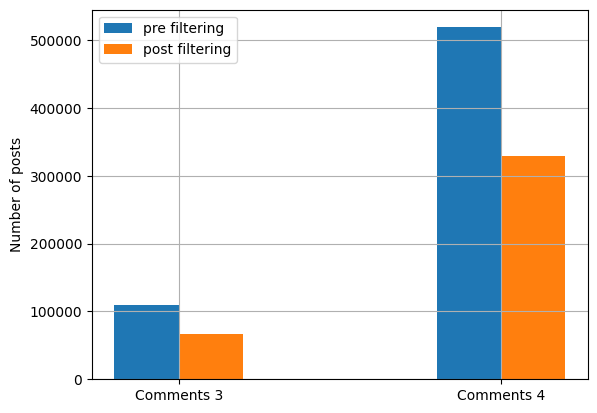

In [61]:
pres = [109125, 519102]
posts = [66983, 328805]

x = np.array([1,2])
plt.bar(x-0.2, pres, width=0.2)
plt.bar(x, posts, width=0.2)
plt.legend(['pre filtering', 'post filtering'])
plt.xticks([0.9, 1.9], ['Comments 3','Comments 4'])
plt.ylabel('Number of posts')
plt.grid()
plt.savefig(f'./exploratory_plots/pre_post_comments.png')

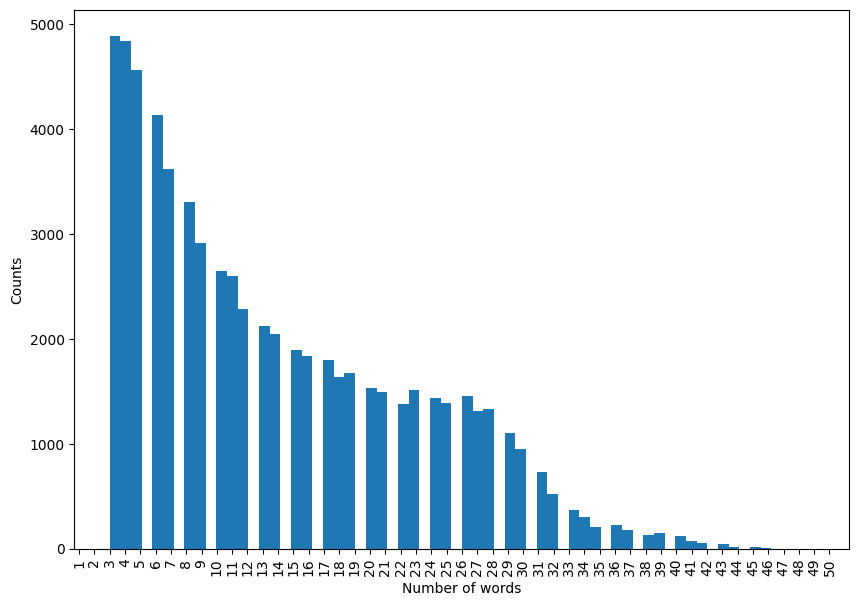

In [41]:
data = pd.read_csv("./combined_comments_3/df_dropped.csv", encoding='utf-8')
data = data.dropna(subset=['message'])

data = data.reset_index()

lengths = [len(i.split(' ')) for i in data['message']]
lengths = [i for i in lengths if i < 50]
plt.figure(figsize=(10, 7))
plt.hist(lengths, bins=get_fdr(lengths))
plt.xticks(list(range(1,51)), rotation=90)
plt.xlabel("Number of words"); plt.ylabel("Counts")
# plt.savefig(f'./exploratory_plots/words_post_4.png')
plt.show()

In [3]:
def get_fdr(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = (2 * iqr) / (len(data) ** (1/3))
    num_bins = int((max(data) - min(data)) / bin_width)
    return num_bins

In [46]:
data = pd.read_csv("../combined_comments_3.csv", encoding='utf-8')
data = data.dropna(subset=['text'])

data = data.reset_index()

short_texts = [i for i in data['text'] if len(i.split(' ')) < 3]
short_texts

['amen',
 'Thank you',
 '🌹🌹🌹',
 '🥰',
 'Thank you',
 'Thanks kamree',
 'Thank you',
 'Thank you',
 'Thank you',
 '❤️❤️❤️',
 '❤️❤️❤️',
 'Thank you',
 'Thank you',
 'Thank you',
 'Thank you',
 'Thank you',
 'They are!',
 'Thank you',
 'Thank you',
 'thank you',
 '❤️❤️❤️❤️',
 '💜💜💜💜',
 '😳😳😳',
 '🙏🏻💪💪💪❤️❤️❤️',
 'Time',
 'POS',
 'POS',
 '100% agree!',
 'EVEN FUNNIER😂😂😂',
 'W shirt',
 'Obviously',
 '💀',
 'Omfg 😂😂😂',
 '🙏❤️🫂',
 '🙏🏼🕯️🕊️🕯️🕊️🕯️🕊️🕯️🙏🏼',
 '🫂🫂🫂🫂🫂🫂🙏🙏🙏🙏🙏🙏🫂🫂🫂🫂🫂🫂',
 '🙏🏼🙏🏼🙏🏼🙏🏼',
 '🙏🏻🙏🏻🙏🏻🙏🏻',
 '🙏🙏🙏🙏🙏❤️\u200d🩹❤️\u200d🩹❤️\u200d🩹❤️\u200d🩹❤️\u200d🩹',
 '🥺🥺🥺🥺🥺🥺',
 '🙏🏿🙏🏿🙏🏿',
 '💛💛💛💛💛💛💛💛💛💛',
 '🫂\U0001fa75🙏🏼',
 '🥰🥰🥰🥰🥰🥰',
 '🧿🕯️🕊️🙏🏼❤️\u200d🩹',
 'RIP #CICI4EVER23',
 '🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼',
 'love you',
 'Ouch!!!🙏💜🫂🫂🫂',
 '♥️♥️♥️',
 '♥️♥️♥️',
 '😢😢😢',
 '🙏❤️🙏',
 '🥰🥰🥰🥰',
 'Gracias Manny🙏🏽🥰',
 '❤️',
 '♥️🙏',
 '❤️❤️❤️❤️❤️',
 '♥️♥️♥️',
 '#justiceforNick',
 '🙏🏽',
 '100%😢',
 '🙏😢',
 '💔🙏',
 '❤️❤️❤️',
 '💜💪',
 '🙏🏿🙏🏿🙏🏿🙏🏿🙏🏿🙏🏿🙏🏿❤️❤️❤️❤️❤️❤️',
 '🙏🏾🙏🏾',
 '🙏',
 '🙏🙏🙏',
 '🙏🙏💜',
 '❤️',
 '🥰🥰🥰',
 'Absolutely 💪',
 'WDR 2/2000',
 'Xoxo 🙏🙏🙏❤️

In [28]:
get_fdr(lengths)

450

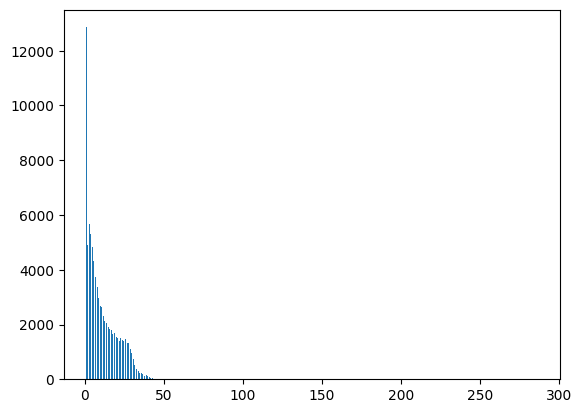

In [30]:
plt.hist(lengths, bins=get_fdr(lengths))
plt.show()